# Assignment 1
In this assignment you will

*   download the dataset
*   split the data
*   write dataloader class that reads the images and applies augmentation.

Read the comments carefully and insert your code where you see: <br><br><b>##### START OF YOUR CODE #####</b><br><br><b>##### END OF YOUR CODE #####</b><br><br>or for the inline codes you will see<br><br><b>##### INSERT YOUR CODE HERE #####</b>

### 1. Download Data

<p>You will use the <a href="https://www.kaggle.com/datasets/maedemaftouni/large-covid19-ct-slice-dataset?select=meta_data_cap.csv"> COVID-19 CT dataset </a> for this assignment. You may create an account on Kaggle and follow  <a href="https://www.kaggle.com/general/74235">the steps below taken from Kaggle's website</a> for easy download (Option 1) or simply download the dataset in your computer and upload it to your Google Drive (Option 2).<br>Option 2 is much slower although straightforward.</p>



In [ ]:
!pip install -q kaggle

In [ ]:
# Go to your account on Kaggle, scroll to API section and click "Create New API Token" to download "kaggle.json" file to your computer.
# IMPORTANT: you need to click "Expire API Token" to remove previous tokens before creating a new one if you have previously created an API token.
# Run this cell and choose the kaggle.json file that you downloaded
from google.colab import files
files.upload()

In [ ]:
#Make directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download the dataset
!kaggle datasets download -d 'maedemaftouni/large-covid19-ct-slice-dataset'

### 2. Unzip the data
<p>We are going to unzip the dataset to Colab's /tmp/ folder as it is faster than accessing it everytime through Google Drive.<br>Run <b>only the first cell</b> if you followed <b>Option 1</b> in the previous section.<br>Run <b>only the second cell</b> if you followed <b>Option 2</b> in the previous section.</p>

In [ ]:
import shutil

shutil.unpack_archive("/content/large-covid19-ct-slice-dataset.zip", "/tmp/")

In [10]:
import shutil
from google.colab import drive

drive.mount("/content/gdrive")
# Change the code below if the path to the dataset is different for you.
shutil.unpack_archive("/content/gdrive/MyDrive/archive.zip", "/tmp/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 3. Data Investigation

<p>The data consists of computerized tomography (CT) images from 3 patient groups:

*   Healthy controls
*   Covid-19 patients
*   Patients with community-acquired pneumonia (CAP)

Let's read the meta files to compute the number of patients in each group. After this step we will exclude CAP patients as the data size is very small.</p>

In [11]:
import pandas as pd

meta_normal = pd.read_csv("/tmp/meta_data_normal.csv")
meta_covid = pd.read_csv("/tmp/meta_data_covid.csv", encoding='windows-1252')
meta_cap = pd.read_csv("/tmp/meta_data_cap.csv")

# Define the variables below using meta dataframes

normal_pt_nb = len(meta_normal['Patient ID'].unique())   ##### INSERT YOUR CODE HERE ##### # Number of patients in normal group
covid_pt_nb = len(meta_covid['Patient ID'].unique())  ##### INSERT YOUR CODE HERE ##### # Number of patients in covid group
cap_pt_nb = len(meta_cap['Patient ID'].unique()) ##### INSERT YOUR CODE HERE ##### # Number of patients in CAP group

normal_img_nb = len(meta_normal['File name'].unique())  ##### INSERT YOUR CODE HERE ##### # Number of images in normal group
covid_img_nb = len(meta_covid['File name'].unique())   ##### INSERT YOUR CODE HERE ##### # Number of images in covid group
cap_img_nb = len(meta_cap['File name'].unique())    ##### INSERT YOUR CODE HERE ##### # Number of images in CAP group


print("Normal")
print("Number of patient: ", normal_pt_nb)
print("Number of image: ", normal_img_nb)

print("\nCovid")
print("Number of patient: ", covid_pt_nb)
print("Number of image: ", covid_img_nb)

print("\nCAP")
print("Number of patient: ", cap_pt_nb)
print("Number of image: ", cap_img_nb)

Normal
Number of patient:  604
Number of image:  6893

Covid
Number of patient:  464
Number of image:  7593

CAP
Number of patient:  54
Number of image:  2618


### 4. Splitting
We will split the train, validation and test sets as 30% - 20% - 50%. At the end of this step you should have 4 lists named:
*   normal_val_file_list,
*   normal_test_file_list,
*   covid_val_file_list
*   covid_test_file_list

corresponding to the lists of filenames for validation and test sets in normal and covid group. <br>IMPORTANT: We must do the splitting on patient level to avoid data leakage. You can see the effect of splitting on data leakage in <a href= "https://www.nature.com/articles/s41598-021-01681-w#Sec2">this article</a> (check Table 4).

In [12]:
import numpy as np

# Set seed to get the same result (I specifically chose this seed after a couple of tries so that we'll have approximately same split ratios on slice level as well)
np.random.seed(58)
val_split_size = .2
test_split_size = .5

normal_val_file_list, normal_test_file_list = [], []
covid_val_file_list, covid_test_file_list = [], []

##### START OF YOUR CODE #####

# Group data by patient
normal_patients = meta_normal['Patient ID'].unique()
covid_patients = meta_covid['Patient ID'].unique()


# Randomly shuffle the patient IDs
np.random.shuffle(normal_patients)
np.random.shuffle(covid_patients)

# Split patients into validation,train and test sets
normal_val_size = int(normal_pt_nb * val_split_size)
normal_test_size = int(normal_pt_nb  * test_split_size)
# normal_train_size = int(normal_pt_nb * .3)

covid_val_size = int(covid_pt_nb * val_split_size)
covid_test_size = int(covid_pt_nb * test_split_size)
# covid_train_size = int(covid_pt_nb * .3)

## noncovid patients
normal_val_patients = normal_patients[:normal_val_size]
normal_test_patients = normal_patients[normal_val_size:normal_val_size + normal_test_size]
normal_train_patients = normal_patients[normal_val_size + normal_test_size:]

#covid patients
covid_val_patients = covid_patients[:covid_val_size]
covid_test_patients = covid_patients[covid_val_size:covid_val_size + covid_test_size]
covid_train_patients = covid_patients [covid_val_size + covid_test_size:]


# Get file lists for validation and test sets
normal_val_file_list = meta_normal[meta_normal['Patient ID'].isin(normal_val_patients)]['File name'].tolist()
print("normal val file list:  " , len( normal_val_file_list) )
normal_test_file_list = meta_normal[meta_normal['Patient ID'].isin(normal_test_patients)]['File name'].tolist()
print("normal test file list:  " , len (normal_test_file_list) )
normal_train_file_list = meta_normal[meta_normal['Patient ID'].isin(normal_train_patients)]['File name'].tolist()
print("normal train file list:  " , len (normal_train_file_list) )

covid_val_file_list = meta_covid[meta_covid['Patient ID'].isin(covid_val_patients)]['File name'].tolist()
covid_test_file_list = meta_covid[meta_covid['Patient ID'].isin(covid_test_patients)]['File name'].tolist()
covid_train_file_list = meta_covid[meta_covid['Patient ID'].isin(covid_train_patients)]['File name'].tolist()


##### END OF YOUR CODE #####

print("Slice-based val size: ")
print("Normal: ", round(len(normal_val_file_list)/normal_img_nb, 2))
print("Covid: ", round(len(covid_val_file_list)/covid_img_nb, 2))

print("\nSlice-based test size: ")
print("Normal: ", round(len(normal_test_file_list)/normal_img_nb, 2))
print("Covid: ", round(len(covid_test_file_list)/covid_img_nb, 2))

## Train group
print("\nSlice-based train size: ")
print("Normal: ", round(len(normal_train_file_list)/normal_img_nb, 2))
print("Covid: ", round(len(covid_train_file_list)/covid_img_nb, 2))

normal val file list:   1427
normal test file list:   3491
normal train file list:   1975
Slice-based val size: 
Normal:  0.21
Covid:  0.18

Slice-based test size: 
Normal:  0.51
Covid:  0.5

Slice-based train size: 
Normal:  0.29
Covid:  0.32


MOVE FILES<br>
When you run the following cell, it will create train, val, test directories and move the files in the lists you created above to their corresponding folder. At the end of this step the directory order will be as:

/tmp/<br>
└───curated_data/<br>
│&emsp;&emsp;&emsp;└───data/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───train/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───normal/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───covid/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───val/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───normal/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───covid/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───test/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───normal/<br>
│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;│&emsp;&emsp;&emsp;└───covid/<br><br>
To check if we moved the files correctly we will print the percentages of train, val and test sets as well as the percentage of covid + images within each set to ensure balanced splitting.

In [77]:
import os
import shutil

##### START OF YOUR CODE #####


noncovid_base_dir = "/tmp/curated_data/curated_data/1NonCOVID"
covid_basic_dir = "/tmp/curated_data/curated_data/2COVID"

# Define the base directory where the data is stored
base_dir = "/tmp/curated_data/data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Define the subdirectories for different classes
normal_train_dir = os.path.join(train_dir, "normal")
covid_train_dir = os.path.join(train_dir, "covid")

normal_val_dir = os.path.join(val_dir, "normal")
covid_val_dir = os.path.join(val_dir, "covid")

normal_test_dir = os.path.join(test_dir, "normal")
covid_test_dir = os.path.join(test_dir, "covid")

# Create directories if they don't exist
os.makedirs(normal_train_dir, exist_ok=True)
os.makedirs(covid_train_dir, exist_ok=True)
os.makedirs(normal_val_dir, exist_ok=True)
os.makedirs(covid_val_dir, exist_ok=True)
os.makedirs(normal_test_dir, exist_ok=True)
os.makedirs(covid_test_dir, exist_ok=True)

# Move the files to their corresponding directories

# Firstly move the non-covid patient files
for file in normal_val_file_list:  ## noncovid validation files
    source_path = os.path.join(noncovid_base_dir, file)
    destination_path = os.path.join(normal_val_dir, os.path.basename(file))

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)           # shutil (source, destination) moves file source to destination
    else:
        #print(f"File '{file}' does not exist in the source directory and will not be moved.")
        continue

for file in normal_test_file_list:  ## noncovid tests files
    source_path = os.path.join(noncovid_base_dir, file)
    destination_path = os.path.join(normal_test_dir, os.path.basename(file))

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
    else:
        #print(f"File '{file}' does not exist in the source directory and will not be moved.")
        continue


for file in normal_train_file_list:  ## noncovid train files
    source_path = os.path.join(noncovid_base_dir, file)
    destination_path = os.path.join(normal_train_dir, os.path.basename(file))

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
    else:
        #print(f"File '{file}' does not exist in the source directory and will not be moved.")
        continue

###################################################################################
# Secondly move the covid patient files
for file in covid_val_file_list:   ## covid validation directory
    source_path = os.path.join(covid_basic_dir, file)
    destination_path = os.path.join(covid_val_dir, os.path.basename(file))

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
    else:
        #print(f"File '{file}' does not exist in the source directory and will not be moved.")
        continue

for file in covid_test_file_list:  ## covid test directory
    source_path = os.path.join(covid_basic_dir, file)
    destination_path = os.path.join(covid_test_dir, os.path.basename(file))

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
    else:
        #print(f"File '{file}' does not exist in the source directory and will not be moved.")
        continue



for file in covid_train_file_list:  ## covid train directory
    source_path = os.path.join(covid_basic_dir, file)
    destination_path = os.path.join(covid_train_dir, os.path.basename(file))

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
    else:
        #print(f"File '{file}' does not exist in the source directory and will not be moved.")
        continue


##### END OF YOUR CODE #####

data_counts = {x+y: len(os.listdir("/tmp/curated_data/data/"+x+y)) for x in ["train/", "val/", "test/"] for y in ["normal/", "covid/"]}
for i in ["train", "val", "test"]:
  print("\nPercentage of {} set: {:.2f}" .format(i, (data_counts[i+"/normal/"]+data_counts[i+"/covid/"])/sum(data_counts.values())))
  print("Percentage of Covid + slices in {} set is: {:.2f}" .format(i, data_counts[i+"/covid/"]/(data_counts[i+"/normal/"]+data_counts[i+"/covid/"])))


Percentage of train set: 0.30
Percentage of Covid + slices in train set is: 0.55

Percentage of val set: 0.19
Percentage of Covid + slices in val set is: 0.49

Percentage of test set: 0.51
Percentage of Covid + slices in test set is: 0.52


### 4. Dataset
To create a custom dataset, first we will write the necessary functions which are:
*   img_paths
*   read_and_resize_img
*   augmentation

#### I. Image Paths
You will write a function that takes data_dir and partition arguments and returns a shuffled list of normal and covid image paths within that partition. Random seed is not necessary.<br>

In [16]:
import random

def img_paths(data_dir, partition):
  ##### START OF YOUR CODE #####


  if partition not in ["train", "val", "test"]:
        raise ValueError("Invalid partition. Please use 'train', 'val', or 'test'.")

  normal_dir = os.path.join(data_dir, partition, "normal")
  covid_dir = os.path.join(data_dir, partition, "covid")

  normal_paths = [os.path.join(normal_dir, filename) for filename in os.listdir(normal_dir)]
  covid_paths = [os.path.join(covid_dir, filename) for filename in os.listdir(covid_dir)]

  # Shuffle the lists
  random.shuffle(normal_paths)
  random.shuffle(covid_paths)

  # Combine the lists into a single list and shuffle it again
  all_paths = normal_paths + covid_paths
  random.shuffle(all_paths)

  return all_paths

  ##### END OF YOUR CODE #####

In [17]:
data_dir = "/tmp/curated_data/data/"
train_paths = img_paths(data_dir, "train")
val_paths = img_paths(data_dir, "val")
test_paths = img_paths(data_dir, "test")

print(len(train_paths), len(val_paths), len(test_paths))

4377 2791 7318


#### II. Read and Resize Image
You will write read_and_resize_img function that takes path and image_size arguments. It will
*   reads the image path using Image module of PIL package
*   converts the image to grayscale
*   adds the channel dimension
*   normalize to [0, 1]
*   resizes if the size of the image is different than image_size.<br>

Ex: read_and_resize_img(path="path/to/image/", image_size=256) should return a <b>torch tensor</b> with a size of (1, 256, 256).

In [36]:
from PIL import Image
import torch
import torchvision.transforms as T


def read_and_resize_img(path, image_size):
  ##### START OF YOUR CODE #####

  # Open the image using PIL
  image = Image.open(path)

  # Convert the image to grayscale
  image = image.convert("L")

  # Normalize the image to the [0, 1] range
  image = T.functional.to_tensor(image)

  # If the image size is different from image_size, resize it
  if image.size != (image_size, image_size):
      image = T.functional.resize(image, image_size, antialias=True) # here added antialias

  return image


  ##### END OF YOUR CODE #####

torch.Size([1, 256, 256])


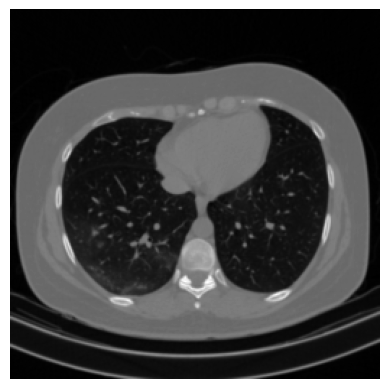

In [38]:
# Visualize sample image
import matplotlib.pyplot as plt

# 6_Rahimzadeh_137covid_patient119_SR_4_IM00029
# P024_132

#if "P024_132.png" in covid_test_file_list:
#  print("file is in the list")
#else:
#  print("file is out of list")



sample_path = "/tmp/curated_data/data/test/covid/P024_132.png"


img = read_and_resize_img(sample_path, image_size=256)


print(img.shape)
plt.imshow(img[0], cmap="gray")
plt.axis("off")
plt.show()

#### III. Augmentation
There are various augmentation techniques but we need to make sure that these reflect the variations that we might encounter in real life. That is why we will use Torchio library which is specifically designed for radiology data. Take a look at the augmentation transforms in <a href="https://torchio.readthedocs.io/transforms/augmentation.html">here</a>. You will write a function that applies the following transforms with the desired probability:

*    Random Noise with p = .2
*    Random Bias Field with p = .2
*    Random Ghosting with p = .2
*    Random Spike with p = .2
*    Random Affine with the parameters of (degrees=10, scales=0., translation=0.)and p = .2

Your function should apply either one of these augmentations and it should apply transformation only in 80% of the time.

NOTE: Torchio requires 4D (channel, width, height, slice) data. So you'll need to expand a dimension while transforming. Don't forget to squeeze it back to original.

Ex: augmentation(data) should return a transformed tensor with a shape of (C, W, H) where C is channel, W is width and H is height.

In [39]:
# First download torchio
!pip install -q torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 8.7 MB/s eta 0:00:00


In [42]:
import torchio as tio

def augmentation(data):
  ##### START OF YOUR CODE #####

  # Convert the data tensor to 4D (channel, width, height, slice)
    data = data.unsqueeze(0)

    # Create a torchio subject with the data
    subject = tio.Subject(
        one_image=tio.ScalarImage(tensor=data, orientation='SAL')
    )

   # Define the augmentation pipeline
    augmentation = tio.Compose([
        tio.OneOf({
            tio.RandomNoise(): 0.2,
            tio.RandomBiasField(): 0.2,
            tio.RandomGhosting(): 0.2,
            tio.RandomSpike(): 0.2,
            tio.RandomAffine(degrees=10, scales=0, translation=0): 0.2
        })
    ])

    # Apply the augmentation
    augmented_subject = augmentation(subject)

    # Extract the transformed data tensor
    augmented_data = augmented_subject.one_image.data

    # Squeeze the batch dimension and return
    augmented_data = augmented_data.squeeze(0)

    return augmented_data

  ##### END OF YOUR CODE #####

torch.Size([1, 256, 256])


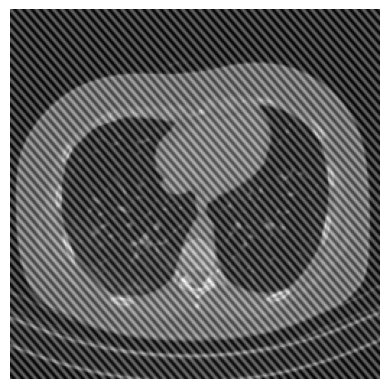

In [43]:
img = read_and_resize_img(sample_path, image_size=256)

aug_img = augmentation(img)
print(aug_img.shape)

plt.imshow(aug_img[0], cmap="gray")
plt.axis("off")
plt.show()

#### V. Create CustomDataset class using the functions above. You need to define 2 more functions in this class.

*   **\_\_len\_\_(self)** > returns the size of the data
*   **\_\_getitem\_\_(self, idx)** > returns a tuple of image and label

NOTE: Do the necessary modifications to use the function arguments as class attributes for a cleaner code.

In [71]:
import os
import numpy as np
import torch
from PIL import Image
import torchio as tio
import torchvision.transforms as T


class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, image_size, data_folder, partition):
    ##### START OF YOUR CODE #####

     self.image_size = image_size
     self.data_folder = data_folder
     self.partition = partition
     self.image_paths = self.img_paths()
     self.image_shape = (1, self.image_size, self.image_size)


    ##### END OF YOUR CODE #####

  def __len__(self):
    ##### START OF YOUR CODE #####
    return len(self.image_paths)
    ##### END OF YOUR CODE #####

  def __getitem__(self, idx):

    ##### START OF YOUR CODE #####
      img_path = self.image_paths[idx]
      img = self.read_and_resize_img(img_path)
      label = int("covid" in img_path)  # 1 for covid, 0 for normal

      # Add an additional dimension of size 1 for both image and label
      img = img.unsqueeze(0)
      label = torch.tensor(label).unsqueeze(0)

      return img, label
    ##### END OF YOUR CODE #####

  def img_paths(self):
    ##### START OF YOUR CODE #####

    normal_dir = os.path.join(self.data_folder, self.partition, "normal")
    covid_dir = os.path.join(self.data_folder, self.partition, "covid")

    normal_paths = [os.path.join(normal_dir, filename) for filename in os.listdir(normal_dir)]
    covid_paths = [os.path.join(covid_dir, filename) for filename in os.listdir(covid_dir)]

    all_paths = normal_paths + covid_paths
    np.random.shuffle(all_paths)
    return all_paths

    ##### END OF YOUR CODE #####

  def read_and_resize_img(self, path):
    ##### START OF YOUR CODE #####
     image = Image.open(path)
     image = image.convert("L")
     image = T.functional.to_tensor(image)

    # Resize all images to a fixed size
     image = T.functional.resize(image, (self.image_size, self.image_size))

     image = image.squeeze(0)  # Remove batch dimension
     return image

    ##### END OF YOUR CODE #####

  def augmentation(self, data):
    ##### START OF YOUR CODE #####
    data = data.unsqueeze(0)
    subject = tio.Subject(one_image=tio.ScalarImage(tensor=data, orientation='SAL'))
    augmentation = tio.Compose([
        tio.OneOf({
              tio.RandomNoise(): 0.2,
              tio.RandomBiasField(): 0.2,
              tio.RandomGhosting(): 0.2,
              tio.RandomSpike(): 0.2,
              tio.RandomAffine(degrees=10, scales=0, translation=0): 0.2
            })
    ])
    augmented_subject = augmentation(subject)
    augmented_data = augmented_subject.one_image.data
    augmented_data = augmented_data.squeeze(0)  # Remove batch dimension
    return augmented_data

    ##### END OF YOUR CODE #####


In [73]:
from torch.utils.data import DataLoader

image_size = 256
data_dir = "/tmp/curated_data/data"
batch_size = 16

data_dict = {x: CustomDataset(image_size, data_dir, x) for x in ["train", "val", "test"]}
img_data, lab_data = next(iter(data_dict["train"]))
print(img_data.shape, lab_data.shape)

dataloader_dict = {x: DataLoader(data_dict[x], batch_size) for x in ["train", "val", "test"]}
img, lab = next(iter(dataloader_dict["train"]))
print(img.shape, lab.shape)

torch.Size([1, 256, 256]) torch.Size([1])
torch.Size([16, 1, 256, 256]) torch.Size([16, 1])


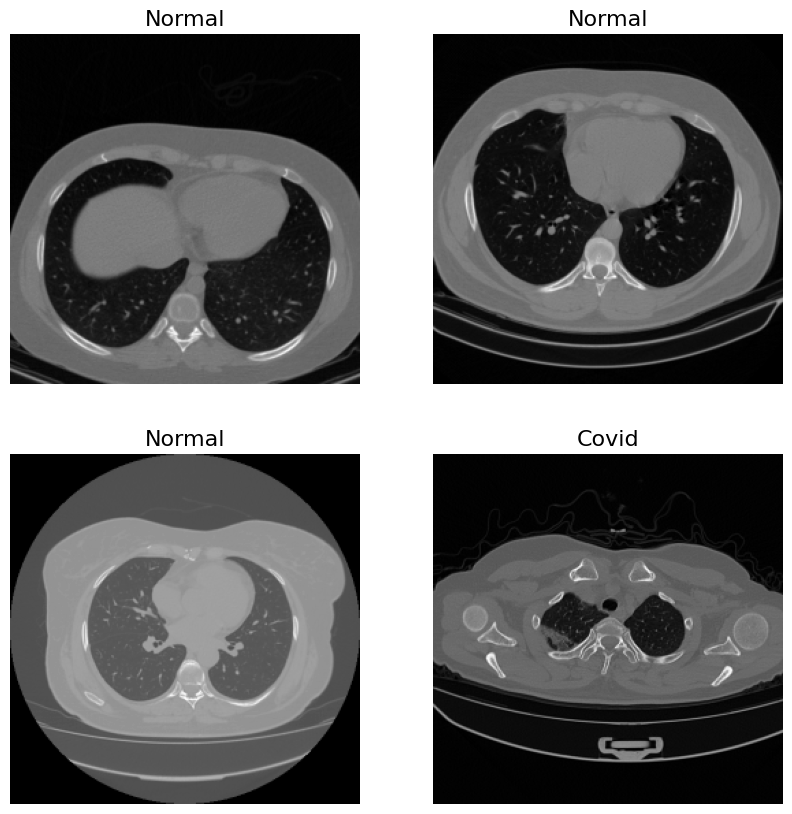

In [75]:
import matplotlib.pyplot as plt

label_dict = {
    0: "Normal",
    1: "Covid"
}
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(2,2, i+1)
  plt.imshow(img[i, 0], cmap="gray")
  plt.title(label_dict[int(lab[i].item())], fontsize=16)
  plt.axis("off")
plt.show()